# 下準備

## ライブラリのインポート

In [51]:
# ライブラリのインポート
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import requests
from statsmodels.tsa.stattools import adfuller
from termcolor import colored as cl

## 表示設定

In [3]:
# 表示設定
plt.rcParams['figure.figsize'] = (20,6)

## データの作成

### 経済データの作成

In [265]:
# 定数の設定
start = dt.date(2013, 10, 1)
end = dt.date(2023, 10, 1)

# 経済データの取得

# 鉄の価格
df_economic_STEEL_PRICE = web.DataReader('WPU10170502', 'fred', start, end)
# ガソリンの価格
df_economic_REGULAR_GAS_PRICE = web.DataReader('GASREGW', 'fred', start, end)
# 車の売上
df_economic_TOTAL_VIHECLE_SALES = web.DataReader('TOTALSA', 'fred', start, end)
# GDP
df_economic_GDP = web.DataReader('GDP', 'fred', start, end) # 3ヶ月に一回
# GDP
df_economic_CARDEMAND = web.DataReader('AMVPNO', 'fred', start, end) # 3ヶ月に一回

df_economic_CARDEMAND

,AMVPNO
DATE,
2013-10-01,47207.0
2013-11-01,48804.0
2013-12-01,45705.0
2014-01-01,45754.0
2014-02-01,48893.0
...,...
2023-04-01,61244.0
2023-05-01,62777.0
2023-06-01,62650.0


In [22]:
df_economic_REGULAR_GAS_PRICE

,JTSJOL
DATE,
2013-10-01,4222
2013-11-01,4119
2013-12-01,4121
2014-01-01,4127
2014-02-01,4373
...,...
2023-04-01,10320
2023-05-01,9616
2023-06-01,9165


In [21]:
df_economic_TOTAL_VIHECLE_SALES

,TOTALSA
DATE,
2013-10-01,15.727
2013-11-01,16.079
2013-12-01,15.835
2014-01-01,15.614
2014-02-01,15.993
...,...
2023-05-01,16.079
2023-06-01,16.602
2023-07-01,16.441


In [210]:
df_economic_GDP

,GDP
DATE,
2013-10-01,17192.019
2013-11-01,17192.019
2013-12-01,17192.019
2014-01-01,17197.738
2014-02-01,17197.738
...,...
2022-12-01,26408.405
2023-01-01,26813.601
2023-02-01,26813.601


### 日次データの作成

In [86]:
API_KEY = '2IPXB7ZSYNPRUB6Y'

# 定数の設定
start = dt.datetime(2013, 10, 1)
end = dt.datetime(2023, 10, 1)

# 複数の銘柄のリスト
tickers = ['TYO', 'F', 'GM', 'HMC', 'STLA']  # 例として4つの銘柄を取得します。必要に応じてリストを変更してください。

# データフレームの初期化
df_stock_da = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-daily',
        start,
        end,
        api_key=API_KEY
    )
    
    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_da.empty:
        df_stock_da = df_stock
    else:
        df_stock_da = df_stock_da.join(df_stock)

df_stock_da

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

### 週次データの作成

In [87]:
# データフレームの初期化
df_stock_we = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-weekly',
        start,
        end,
        api_key=API_KEY
    )

    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_we.empty:
        df_stock_we = df_stock
    else:
        df_stock_we = df_stock_we.join(df_stock)

df_stock_da

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

### 月次データの作成

In [88]:
# データフレームの初期化
df_stock_mo = pd.DataFrame()

# 各銘柄のデータ取得
for ticker in tickers:
    df_stock = web.DataReader(
        ticker,
        'av-daily',
        start,
        end,
        api_key=API_KEY
    )
    
    # closeの価格だけを取得し、カラム名を銘柄名に変更
    df_stock = df_stock[['close']].rename(columns={'close': ticker})
    
    # 合成データフレームへの追加
    if df_stock_mo.empty:
        df_stock_mo = df_stock
    else:
        df_stock_mo = df_stock_mo.join(df_stock)

df_stock_mo

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

In [129]:
# CSVファイルに保存

df_stock_da.to_csv('/Users/klynoaguilar/Desktop/01_school/Zemi/23_10_27_week-03/stock_da.csv')
df_stock_we.to_csv('/Users/klynoaguilar/Desktop/01_school/Zemi/23_10_27_week-03/stock_we.csv')
df_stock_mo.to_csv('/Users/klynoaguilar/Desktop/01_school/Zemi/23_10_27_week-03/stock_mo.csv')

## データを作成

In [130]:
df_stock_mo = pd.read_csv('../23_10_27_week-03/stock_mo.csv')
df_stock_mo = df_stock_mo.rename(columns={'Unnamed: 0': 'Date'})

# 'Date'列を日付型に変換
df_stock_mo['Date'] = pd.to_datetime(df_stock_mo['Date'])

# インデックスを日付に設定
df_stock_mo.set_index('Date', inplace=True)

# 月次データにリサンプリング
df_stock_mo = df_stock_mo.resample('MS').mean()

df_stock_mo


,TYO,F,GM,HMC,STLA
Date,,,,,
2013-10-01,24.394770,17.236957,35.500870,39.493478,8.323913
2013-11-01,24.467125,16.947500,37.649500,40.950000,7.607500
2013-12-01,25.189890,16.084286,40.404286,41.098571,7.629524
2014-01-01,24.696819,15.901905,38.755714,39.600952,9.728095
2014-02-01,23.508516,15.080526,35.921053,36.416842,10.165263
...,...,...,...,...,...
2023-05-01,12.250355,11.770000,32.794091,27.623182,16.138636
2023-06-01,12.853895,13.892857,36.616190,30.592857,16.594286
2023-07-01,13.242340,14.398500,39.189500,30.800500,18.620000


In [131]:
df_stock_we = pd.read_csv('../23_10_27_week-03/stock_we.csv')
df_stock_we = df_stock_we.rename(columns={'Unnamed: 0': 'Date'})

# 'Date'列を日付型に変換
df_stock_we['Date'] = pd.to_datetime(df_stock_we['Date'])

# インデックスを日付に設定
df_stock_we.set_index('Date', inplace=True)

# 週次データにリサンプリング
df_stock_we = df_stock_we.resample('W-MON').mean()

df_stock_we

,TYO,F,GM,HMC,STLA
Date,,,,,
2013-10-07,24.8200,17.09,35.70,38.37,8.35
2013-10-14,24.9500,17.11,35.35,40.12,8.65
2013-10-21,24.2500,17.53,35.89,40.40,8.30
2013-10-28,23.7399,17.60,35.59,39.65,8.30
2013-11-04,24.3001,16.89,37.39,40.10,7.60
...,...,...,...,...,...
2023-09-04,14.2500,12.14,33.54,32.33,18.23
2023-09-11,14.4100,12.30,32.95,33.55,18.23
2023-09-18,14.6100,12.61,33.95,35.34,19.25


In [132]:
df_stock_da = pd.read_csv('../23_10_27_week-03/stock_da.csv')
df_stock_da = df_stock_da.rename(columns={'Unnamed: 0': 'Date'})

# 'Date'列を日付型に変換
df_stock_da['Date'] = pd.to_datetime(df_stock_da['Date'])

# インデックスを日付に設定
df_stock_da.set_index('Date', inplace=True)

df_stock_da

,TYO,F,GM,HMC,STLA
Date,,,,,
2013-10-01,24.750,17.19,35.91,38.22,8.06
2013-10-02,24.629,17.21,35.94,38.28,8.06
2013-10-03,24.580,16.95,35.29,38.07,8.06
2013-10-04,24.820,17.09,35.70,38.37,8.35
2013-10-07,24.630,16.81,35.18,37.91,8.60
...,...,...,...,...,...
2023-09-25,15.210,12.58,33.06,35.21,19.24
2023-09-26,15.280,12.43,32.26,34.73,18.84
2023-09-27,15.510,12.39,32.35,34.99,18.81


In [104]:
# カラム名の変更
df_stock_we.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# インデックスを日付に設定
df_stock_we.set_index('Date', inplace=True)

# # 週次データにリサンプリング
# df_stock_we = df_stock_we.resample('W-MON').mean()

In [97]:
df_stock_we

,Unnamed: 0,TYO,F,GM,HMC,STLA
0,2013-10-04,24.8200,17.09,35.70,38.37,8.35
1,2013-10-11,24.9500,17.11,35.35,40.12,8.65
2,2013-10-18,24.2500,17.53,35.89,40.40,8.30
3,2013-10-25,23.7399,17.60,35.59,39.65,8.30
4,2013-11-01,24.3001,16.89,37.39,40.10,7.60
...,...,...,...,...,...,...
517,2023-09-01,14.2500,12.14,33.54,32.33,18.23
518,2023-09-08,14.4100,12.30,32.95,33.55,18.23
519,2023-09-15,14.6100,12.61,33.95,35.34,19.25
520,2023-09-22,14.9100,12.43,32.58,35.23,19.35


##  データの確認

In [84]:
df_stock_mo

,TYO,F,GM,HMC,STLA
2013-10-01,24.750,17.19,35.91,38.22,8.06
2013-10-02,24.629,17.21,35.94,38.28,8.06
2013-10-03,24.580,16.95,35.29,38.07,8.06
2013-10-04,24.820,17.09,35.70,38.37,8.35
2013-10-07,24.630,16.81,35.18,37.91,8.60
...,...,...,...,...,...
2023-09-25,15.210,12.58,33.06,35.21,19.24
2023-09-26,15.280,12.43,32.26,34.73,18.84
2023-09-27,15.510,12.39,32.35,34.99,18.81
2023-09-28,15.390,12.56,33.16,34.84,19.27


In [13]:
df_stock_we

,TYO,F,GM,HMC,STLA
2013-10-04,24.8200,17.09,35.70,38.37,8.35
2013-10-11,24.9500,17.11,35.35,40.12,8.65
2013-10-18,24.2500,17.53,35.89,40.40,8.30
2013-10-25,23.7399,17.60,35.59,39.65,8.30
2013-11-01,24.3001,16.89,37.39,40.10,7.60
...,...,...,...,...,...
2023-09-01,14.2500,12.14,33.54,32.33,18.23
2023-09-08,14.4100,12.30,32.95,33.55,18.23
2023-09-15,14.6100,12.61,33.95,35.34,19.25
2023-09-22,14.9100,12.43,32.58,35.23,19.35


In [15]:
df_stock_da

,TYO,F,GM,HMC,STLA
2013-10-01,24.750,17.19,35.91,38.22,8.06
2013-10-02,24.629,17.21,35.94,38.28,8.06
2013-10-03,24.580,16.95,35.29,38.07,8.06
2013-10-04,24.820,17.09,35.70,38.37,8.35
2013-10-07,24.630,16.81,35.18,37.91,8.60
...,...,...,...,...,...
2023-09-25,15.210,12.58,33.06,35.21,19.24
2023-09-26,15.280,12.43,32.26,34.73,18.84
2023-09-27,15.510,12.39,32.35,34.99,18.81
2023-09-28,15.390,12.56,33.16,34.84,19.27


In [12]:
print('Stock Daily data')
print(df_stock_da.head())
print('-----------------')
print('Stock Weekly data')
print(df_stock_we.head())
print('-----------------')
print('Stock Monthly data')
print(df_stock_mo.head())

Stock Daily data
               TYO      F     GM    HMC  STLA
2013-10-01  24.750  17.19  35.91  38.22  8.06
2013-10-02  24.629  17.21  35.94  38.28  8.06
2013-10-03  24.580  16.95  35.29  38.07  8.06
2013-10-04  24.820  17.09  35.70  38.37  8.35
2013-10-07  24.630  16.81  35.18  37.91  8.60
-----------------
Stock Weekly data
                TYO      F     GM    HMC  STLA
2013-10-04  24.8200  17.09  35.70  38.37  8.35
2013-10-11  24.9500  17.11  35.35  40.12  8.65
2013-10-18  24.2500  17.53  35.89  40.40  8.30
2013-10-25  23.7399  17.60  35.59  39.65  8.30
2013-11-01  24.3001  16.89  37.39  40.10  7.60
-----------------
Stock Monthly data
               TYO      F     GM    HMC  STLA
2013-10-01  24.750  17.19  35.91  38.22  8.06
2013-10-02  24.629  17.21  35.94  38.28  8.06
2013-10-03  24.580  16.95  35.29  38.07  8.06
2013-10-04  24.820  17.09  35.70  38.37  8.35
2013-10-07  24.630  16.81  35.18  37.91  8.60


# データ分析

## 関数の作成

[関数]線グラフの作成

In [38]:
def plot_stock_prices(title, dataframe, selected_columns, figsize=(20, 6)):
    """
    Plot stock prices from a dataframe.
    
    Parameters:
    - title: str, the title of the plot.
    - dataframe: pd.DataFrame containing date and stock prices.
    - selected_columns: list, the column names of stock prices to be plotted.
    - figsize: tuple, size of the figure to plot.
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Assuming the Date column is always named 'Date'
    for column in selected_columns:
        ax.plot(dataframe.index, dataframe[column], label=column)

    ax.set_title(f'Stock Price over Time({title})')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    
    # y軸の横の線を点線に設定
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, axis="y")
    # x軸の縦線を消す
    ax.grid(False, axis="x")
    
    # グラフの周りの四角い線を灰色に設定
    for spine in ax.spines.values():
        spine.set_color('gray')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=12))
    
    plt.style.use('tableau-colorblind10')
    plt.tight_layout()
    plt.show()

# 使用例
# selected_columns = ["Stock1", "Stock2"]
# plot_stock_prices('title', dataframe, selected_columns)

[関数]ポートフォリオの作成

In [48]:
def calculate_efficient_frontier(temp_data, selected):
    # calculate daily and annual returns of the stocks
    returns_monthly = temp_data.pct_change()
    returns_annual = returns_monthly.mean() * 12

    # get daily and covariance of returns of the stock
    cov_monthly = returns_monthly.cov()
    cov_annual = cov_monthly * 12

    # 米国国債のリスクフリーレート
    rf_rate = 0.04849

    # empty lists to store returns, volatility and weights of imaginary portfolios
    port_returns = []
    port_volatility = []
    sharpe_ratio = []
    stock_weights = []

    # set the number of combinations for imaginary portfolios
    num_assets = len(selected)
    num_portfolios = 5000

    np.random.seed(101)

    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, returns_annual)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        sharpe = (returns - rf_rate) / volatility  # シャープレシオの計算を修正
        sharpe_ratio.append(sharpe)
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)

    portfolio = {'Returns': port_returns,
                'Volatility': port_volatility,
                'Sharpe Ratio': sharpe_ratio}

    for counter, symbol in enumerate(selected):
        portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

    df = pd.DataFrame(portfolio)
    column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock + ' Weight' for stock in selected]
    df = df[column_order]

    # 最大シャープレシオを持つポートフォリオを探す
    max_sharpe = df['Sharpe Ratio'].max()
    min_volatility = df['Volatility'].min()
    sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
    min_variance_port = df.loc[df['Volatility'] == min_volatility]

    print(sharpe_portfolio.T)
    print(min_variance_port.T)

    df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                    cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
    plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
    plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier with Tangent Portfolio')
    plt.show()

# 使用例:
# calculate_efficient_frontier(temp_data, selected)

[関数]ADF検定

In [60]:
def perform_adf_test_on_dataframe(df, alpha=0.05):
    """
    Conduct the Augmented Dickey-Fuller test for stationarity on each column of a DataFrame and display the results in a table format.
    
    Parameters:
    - df: pd.DataFrame, the dataframe containing time series data for each column to be tested.
    - alpha: float, significance level for the test.

    Returns:
    - pd.DataFrame, table with the test results for each column.
    """
    def adf_test(series):
        result = adfuller(series, autolag='AIC')
        test_statistic = result[0]
        p_value = result[1]
        lags_used = result[2]
        nobs = result[3]
        critical_values = result[4]
        result_dict = {
            "ADF Test Statistic": test_statistic,
            "P-Value": p_value,
            "# Lags Used": lags_used,
            "# Observations": nobs,
            "Result": "Stationary" if p_value <= alpha else "Not Stationary"
        }
        for key, value in critical_values.items():
            result_dict[f'Critical Value ({key})'] = value
        return result_dict
    
    results = {col: adf_test(df[col]) for col in df.columns if col != 'Date'}
    return pd.DataFrame(results).T

# Example usage:
# df_results = perform_adf_test_on_dataframe(df_stock_mo)
# display(df_results)


[関数]トレンド排除：差分

In [63]:
def remove_trend_diff(data) -> pd.DataFrame:
    """
    Apply differencing and drop NaN rows to remove trend non-stationarity from time series data.
    
    Parameters:
    - data: pd.Series or pd.DataFrame, the input data with one or more time series columns.

    Returns:
    - pd.Series or pd.DataFrame, the transformed data with trend non-stationarity removed.
    """
    
    if isinstance(data, pd.Series):
        data_copy = data.copy()
        return data_copy.diff().dropna()
    
    elif isinstance(data, pd.DataFrame):
        data_copy = data.copy()
        
        # List all columns except 'Date'
        cols_to_diff = [col for col in data_copy.columns if col != 'Date']
        
        # Apply diff() for each column except 'Date'
        for col in cols_to_diff:
            data_copy[col] = data_copy[col].diff()
        
        # Drop rows with NaN values
        return data_copy.dropna()
    
    else:
        raise ValueError("Input data must be a pandas DataFrame or Series")

# remove_trend_diff(dataframe)

[関数]トレンド排除：対数

In [70]:
def remove_trend_log(data, selected_columns=None) -> pd.DataFrame:
    """
    Compute the log difference for a given DataFrame or Series.
    
    Parameters:
    - data: pd.DataFrame or pd.Series, the input data with one or more time series columns.
    - selected_columns: list, the columns for which the log difference should be computed.
                    If None, it computes for all columns (except 'Date' if present).

    Returns:
    - pd.DataFrame or pd.Series, the log difference of the original data.
    """
    
    # If data is a Series
    if isinstance(data, pd.Series):
        return np.log(data).diff().dropna()
    
    # If data is a DataFrame
    elif isinstance(data, pd.DataFrame):
        
        # If no specific columns are selected, select all columns except 'Date'
        if selected_columns is None:
            selected_columns = [col for col in data.columns if col != 'Date']
        
        # Apply log difference for each selected column
        for col in selected_columns:
            data[col] = np.log(data[col]).diff()
        
        return data.dropna()
    
    else:
        raise ValueError("Input data must be a pandas DataFrame or Series")

# Example usage
# df_log_diff = remove_trend_log(dataframe, ['Column1', 'Column2'])

## データ分析結果の表示

線グラフの表示

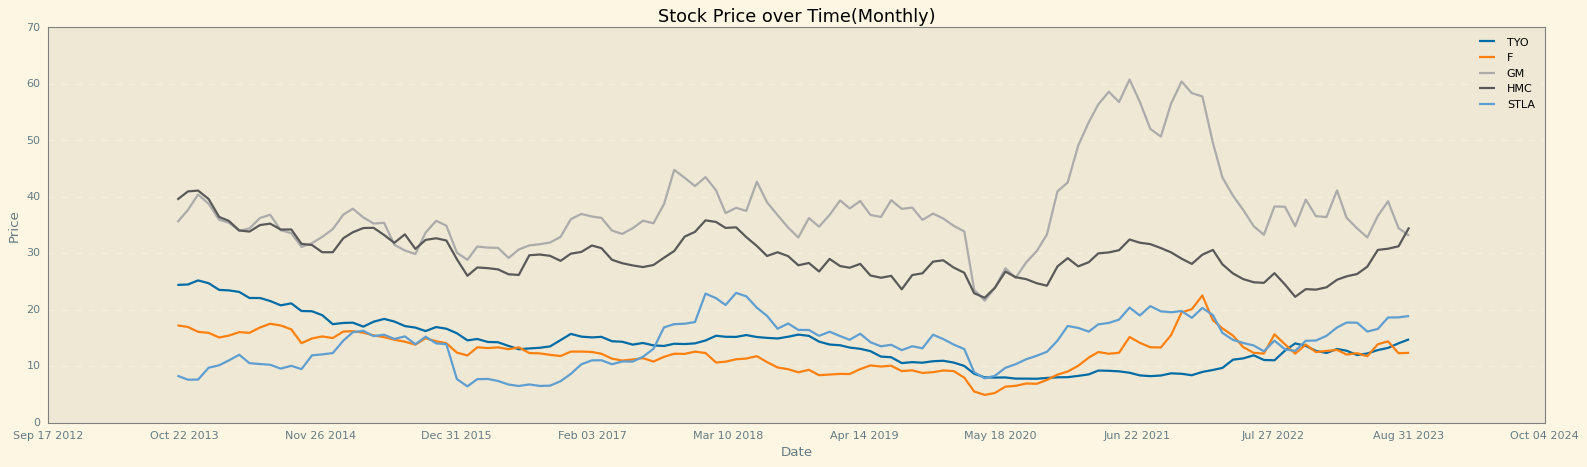

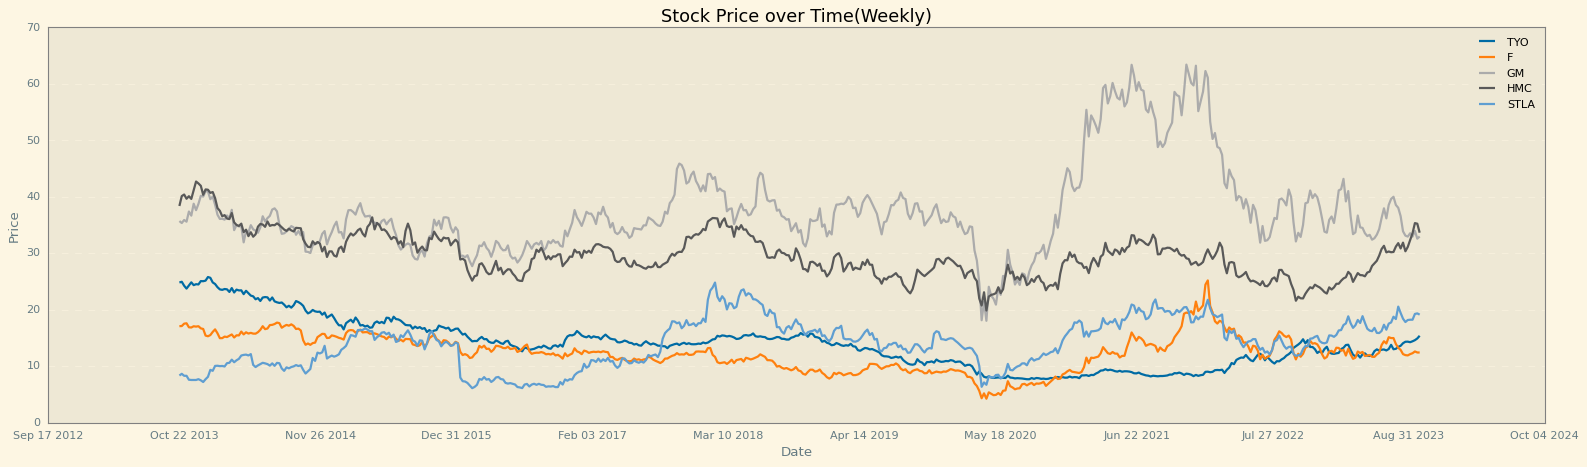

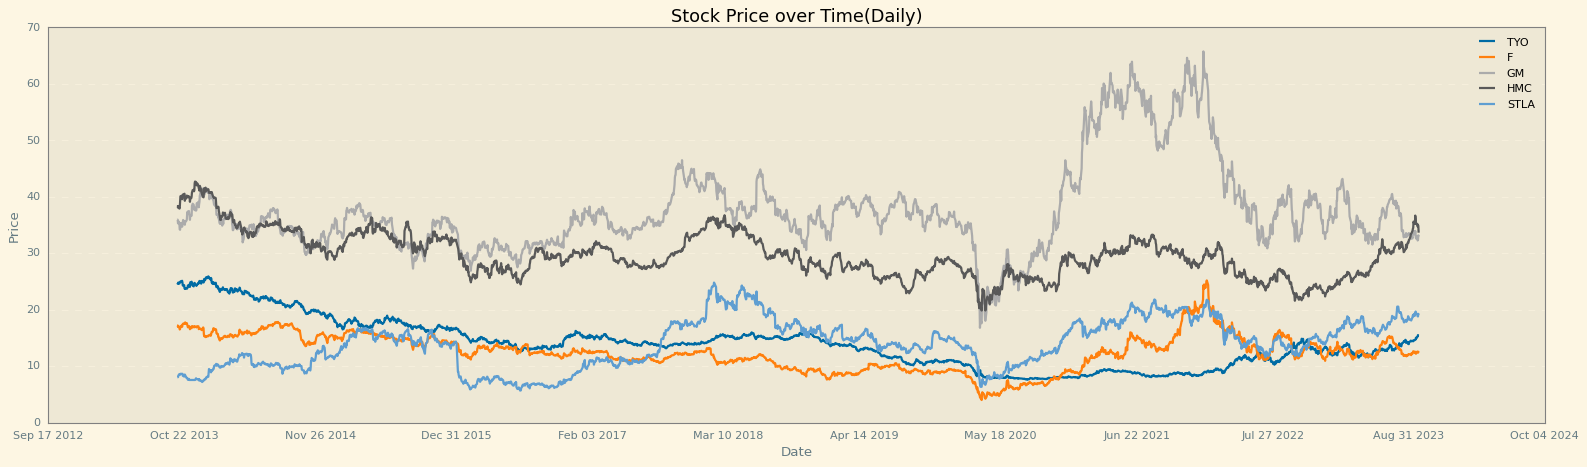

In [140]:
plot_stock_prices('Monthly', df_stock_mo, tickers)
plot_stock_prices('Weekly', df_stock_we, tickers)
plot_stock_prices('Daily', df_stock_da, tickers)

ポートフォリオの作成

                  2571
Returns       0.114394
Volatility    0.308816
Sharpe Ratio  0.213408
TYO Weight    0.023202
F Weight      0.126639
GM Weight     0.080546
HMC Weight    0.046216
STLA Weight   0.723397
                  1128
Returns      -0.015508
Volatility    0.131764
Sharpe Ratio -0.485702
TYO Weight    0.549693
F Weight      0.014118
GM Weight     0.037189
HMC Weight    0.376214
STLA Weight   0.022786


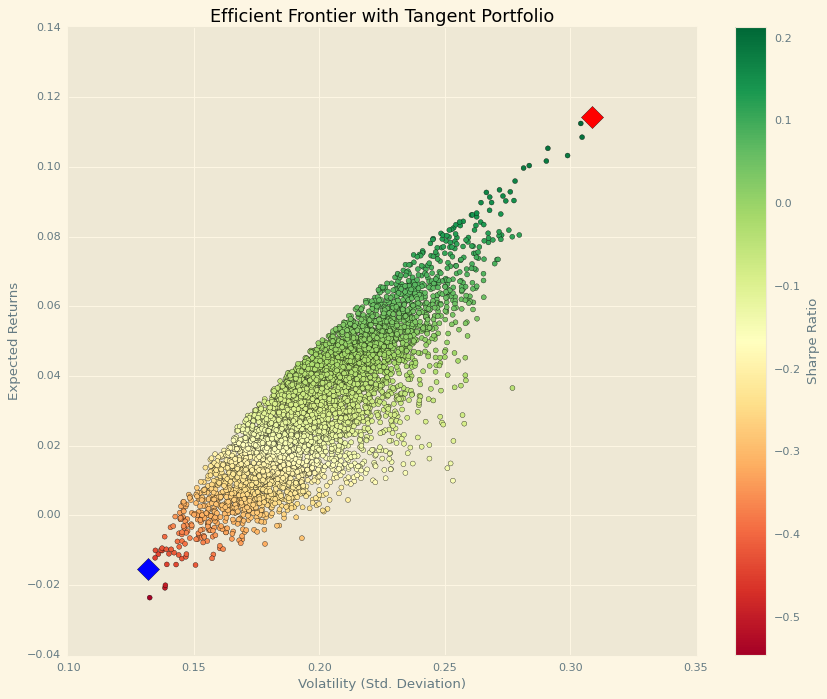

                  2571
Returns       0.032301
Volatility    0.176959
Sharpe Ratio -0.091484
TYO Weight    0.023202
F Weight      0.126639
GM Weight     0.080546
HMC Weight    0.046216
STLA Weight   0.723397
                  1293
Returns      -0.003240
Volatility    0.077188
Sharpe Ratio -0.670190
TYO Weight    0.697866
F Weight      0.015178
GM Weight     0.003401
HMC Weight    0.267857
STLA Weight   0.015698


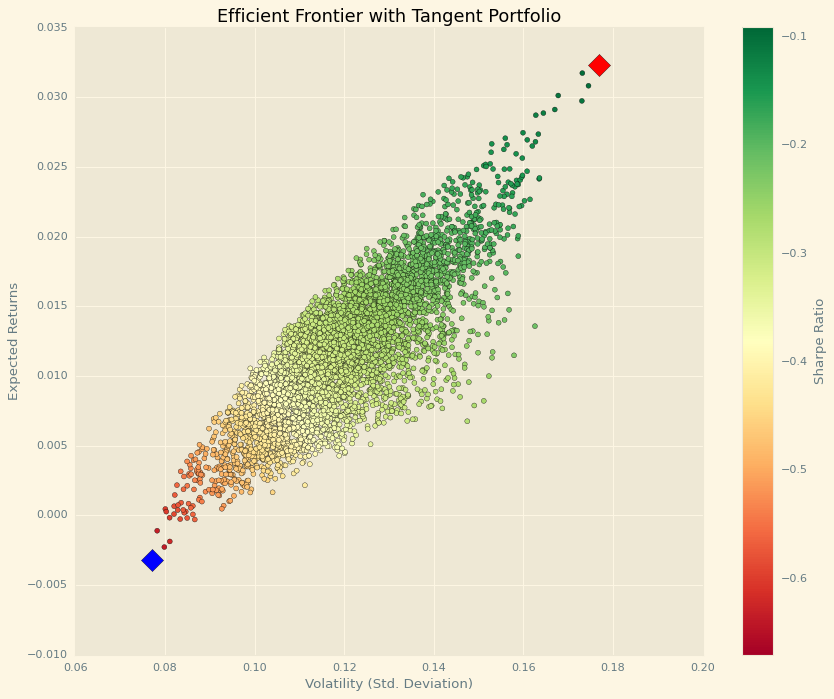

                  2571
Returns       0.006456
Volatility    0.076717
Sharpe Ratio -0.547908
TYO Weight    0.023202
F Weight      0.126639
GM Weight     0.080546
HMC Weight    0.046216
STLA Weight   0.723397
                  1128
Returns      -0.000174
Volatility    0.035703
Sharpe Ratio -1.363031
TYO Weight    0.549693
F Weight      0.014118
GM Weight     0.037189
HMC Weight    0.376214
STLA Weight   0.022786


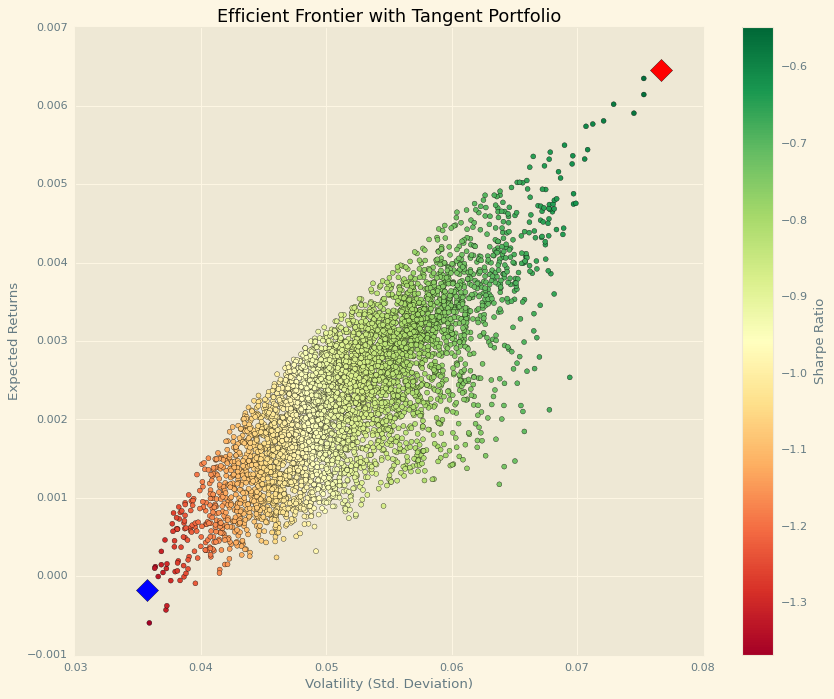

In [134]:
calculate_efficient_frontier(df_stock_mo.copy(), tickers)
calculate_efficient_frontier(df_stock_we.copy(), tickers)
calculate_efficient_frontier(df_stock_da.copy(), tickers)

ADF検定の表示

In [141]:
df_results = perform_adf_test_on_dataframe(df_stock_mo.copy())
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_we.copy())
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_da.copy())
display(df_results)

,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-2.700537,0.073945,1,118,Not Stationary,-3.487022,-2.886363,-2.580009
F,-2.111996,0.239718,7,112,Not Stationary,-3.490131,-2.887712,-2.58073
GM,-2.557537,0.102095,1,118,Not Stationary,-3.487022,-2.886363,-2.580009
HMC,-3.349091,0.012822,1,118,Stationary,-3.487022,-2.886363,-2.580009
STLA,-2.287597,0.175999,1,118,Not Stationary,-3.487022,-2.886363,-2.580009


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-2.76969,0.062735,1,520,Not Stationary,-3.442988,-2.867114,-2.569739
F,-2.563987,0.100671,1,520,Not Stationary,-3.442988,-2.867114,-2.569739
GM,-2.602423,0.092498,0,521,Not Stationary,-3.442964,-2.867103,-2.569733
HMC,-3.038325,0.031467,0,521,Stationary,-3.442964,-2.867103,-2.569733
STLA,-2.301476,0.171492,0,521,Not Stationary,-3.442964,-2.867103,-2.569733


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-2.56813,0.099765,23,2493,Not Stationary,-3.432976,-2.8627,-2.567388
F,-2.679049,0.077734,19,2497,Not Stationary,-3.432972,-2.862698,-2.567387
GM,-2.539195,0.106227,19,2497,Not Stationary,-3.432972,-2.862698,-2.567387
HMC,-3.041092,0.031231,0,2516,Stationary,-3.432952,-2.862689,-2.567382
STLA,-2.324559,0.16417,9,2507,Not Stationary,-3.432961,-2.862694,-2.567384


トレンド排除：差分

In [143]:
df_stock_mo_diff = remove_trend_diff(df_stock_mo.copy())
df_stock_we_diff = remove_trend_diff(df_stock_we.copy())
df_stock_da_diff = remove_trend_diff(df_stock_da.copy())

In [142]:
df_stock_mo

,TYO,F,GM,HMC,STLA
Date,,,,,
2013-10-01,24.394770,17.236957,35.500870,39.493478,8.323913
2013-11-01,24.467125,16.947500,37.649500,40.950000,7.607500
2013-12-01,25.189890,16.084286,40.404286,41.098571,7.629524
2014-01-01,24.696819,15.901905,38.755714,39.600952,9.728095
2014-02-01,23.508516,15.080526,35.921053,36.416842,10.165263
...,...,...,...,...,...
2023-05-01,12.250355,11.770000,32.794091,27.623182,16.138636
2023-06-01,12.853895,13.892857,36.616190,30.592857,16.594286
2023-07-01,13.242340,14.398500,39.189500,30.800500,18.620000


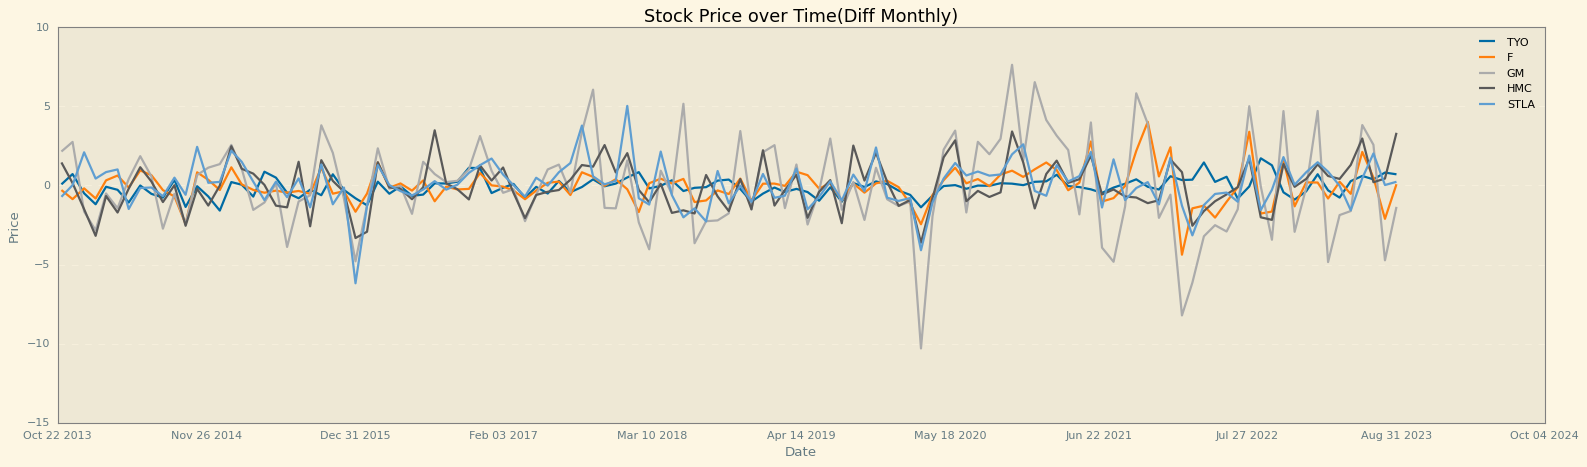

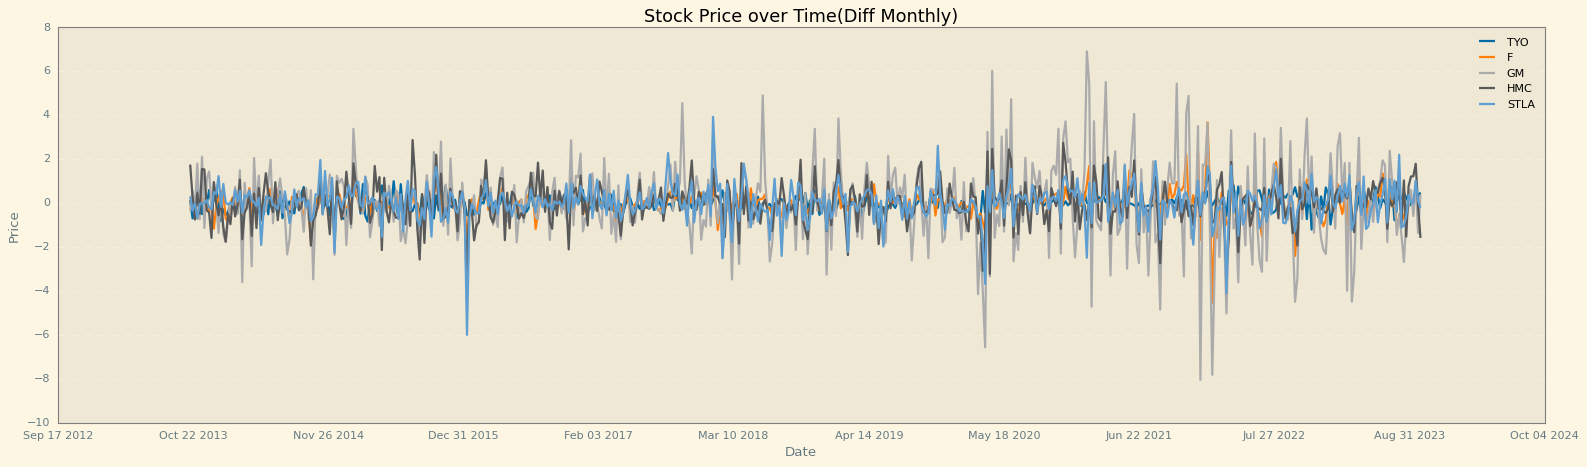

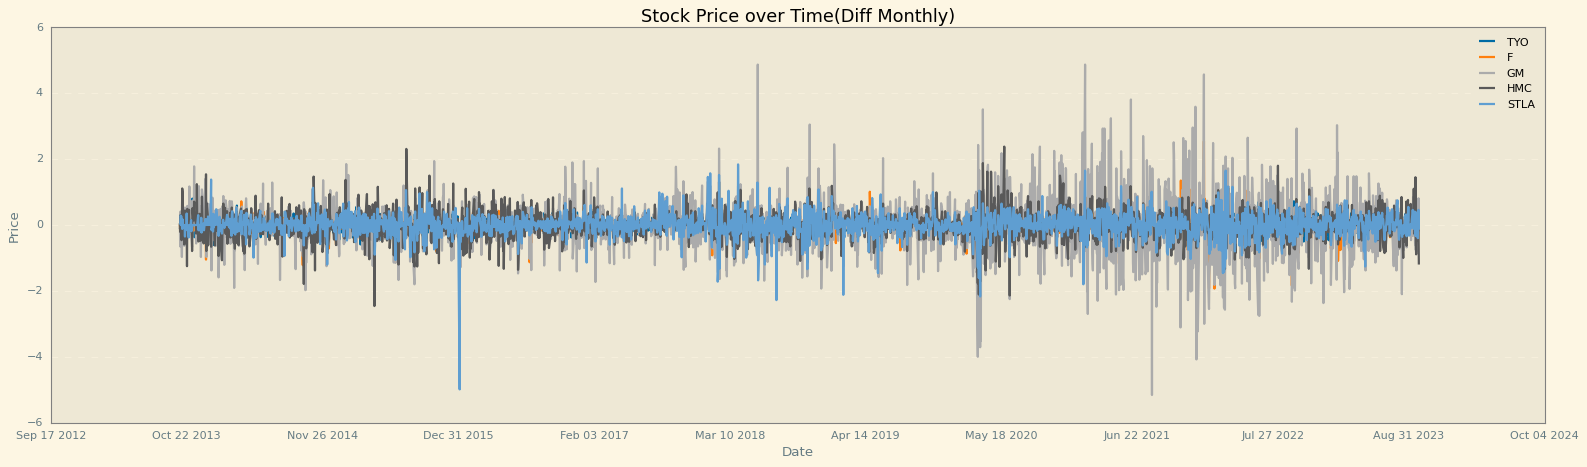

In [147]:
plot_stock_prices("Diff Monthly", df_stock_mo_diff, tickers)
plot_stock_prices("Diff Monthly", df_stock_we_diff, tickers)
plot_stock_prices("Diff Monthly", df_stock_da_diff, tickers)

In [148]:
df_results = perform_adf_test_on_dataframe(df_stock_mo_diff)
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_we_diff)
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_da_diff)
display(df_results)

,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-8.300592,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
F,-3.772688,0.003199,6,112,Stationary,-3.490131,-2.887712,-2.58073
GM,-8.880267,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
HMC,-9.148291,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
STLA,-9.713375,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-15.639428,0.0,1,519,Stationary,-3.443013,-2.867125,-2.569745
F,-21.209607,0.0,0,520,Stationary,-3.442988,-2.867114,-2.569739
GM,-11.361639,0.0,3,517,Stationary,-3.443062,-2.867147,-2.569756
HMC,-14.673749,0.0,2,518,Stationary,-3.443037,-2.867136,-2.56975
STLA,-22.066412,0.0,0,520,Stationary,-3.442988,-2.867114,-2.569739


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-10.429359,0.0,22,2493,Stationary,-3.432976,-2.8627,-2.567388
F,-10.809369,0.0,18,2497,Stationary,-3.432972,-2.862698,-2.567387
GM,-11.567971,0.0,18,2497,Stationary,-3.432972,-2.862698,-2.567387
HMC,-50.684783,0.0,0,2515,Stationary,-3.432953,-2.86269,-2.567382
STLA,-16.127385,0.0,8,2507,Stationary,-3.432961,-2.862694,-2.567384


トレンド排除：対数差分

In [149]:
df_stock_mo_log = remove_trend_log(df_stock_mo.copy(), tickers)
df_stock_we_log = remove_trend_log(df_stock_we.copy(), tickers)
df_stock_da_log = remove_trend_log(df_stock_da.copy(), tickers)

In [269]:
df_economic_CARDEMAND

,AMVPNO
DATE,
2013-10-01,47207.0
2013-11-01,48804.0
2013-12-01,45705.0
2014-01-01,45754.0
2014-02-01,48893.0
...,...
2023-04-01,61244.0
2023-05-01,62777.0
2023-06-01,62650.0


In [270]:
df_STEEL_log = remove_trend_log(df_economic_STEEL_PRICE.copy(), ['WPU10170502'])
df_GAS_log = remove_trend_log(df_economic_REGULAR_GAS_PRICE.copy(), ['GASREGW'])
df_VIHECLE_log = remove_trend_log(df_economic_TOTAL_VIHECLE_SALES.copy(), ['TOTALSA'])
df_GDP_log = remove_trend_log(df_economic_GDP.copy(), ['GDP'])
df_CARDEMAND_log = remove_trend_log(df_economic_CARDEMAND.copy(), ['AMVPNO'])

In [271]:
df_CARDEMAND_log

,AMVPNO
DATE,
2013-11-01,0.033270
2013-12-01,-0.065605
2014-01-01,0.001072
2014-02-01,0.066355
2014-03-01,-0.000552
...,...
2023-04-01,-0.001713
2023-05-01,0.024723
2023-06-01,-0.002025


In [220]:
df_results = perform_adf_test_on_dataframe(df_stock_STEEL_log)
display(df_results)

,# Lags Used,# Observations,ADF Test Statistic,Critical Value (1%),Critical Value (10%),Critical Value (5%),P-Value,Result
WPU10170502,11,105,-2.152887,-3.49422,-2.581676,-2.889485,0.223787,Not Stationary


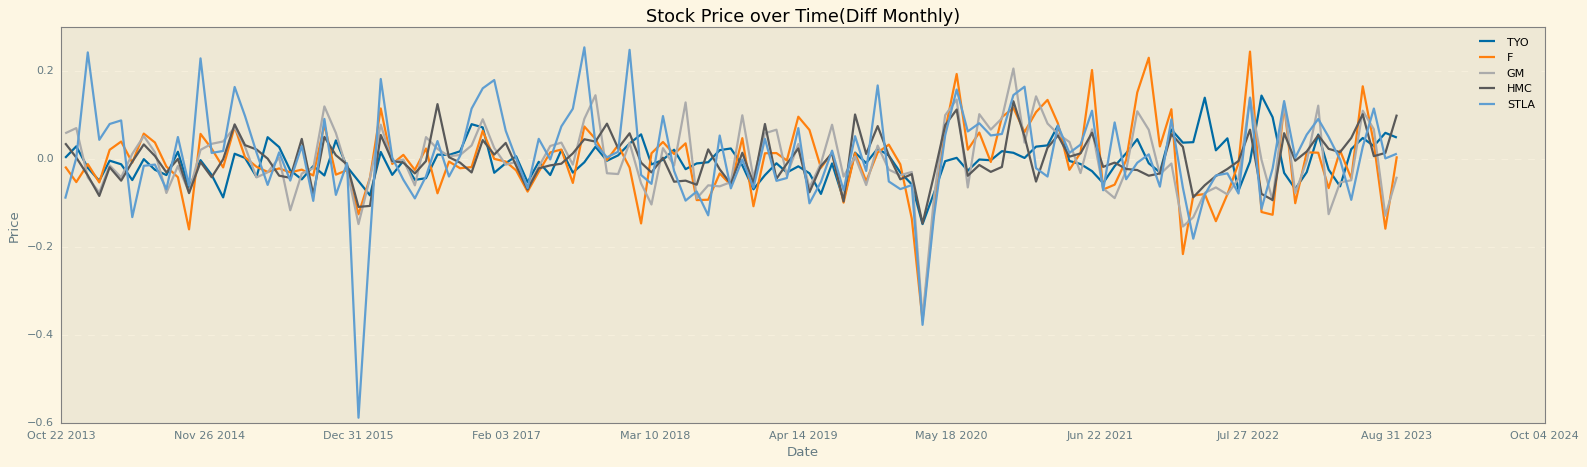

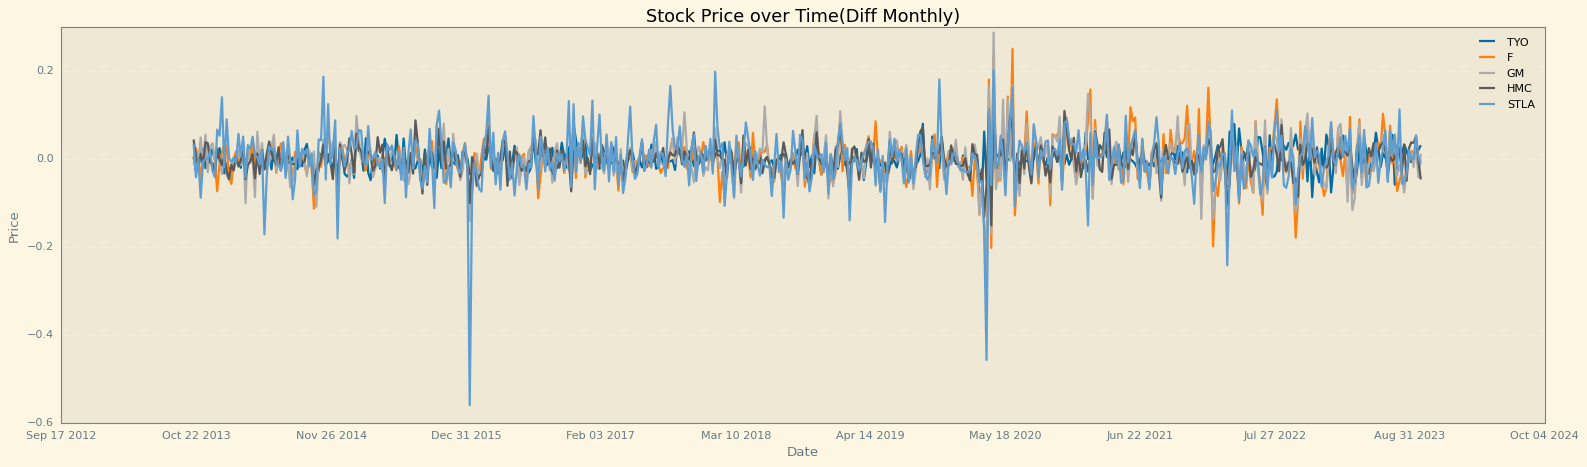

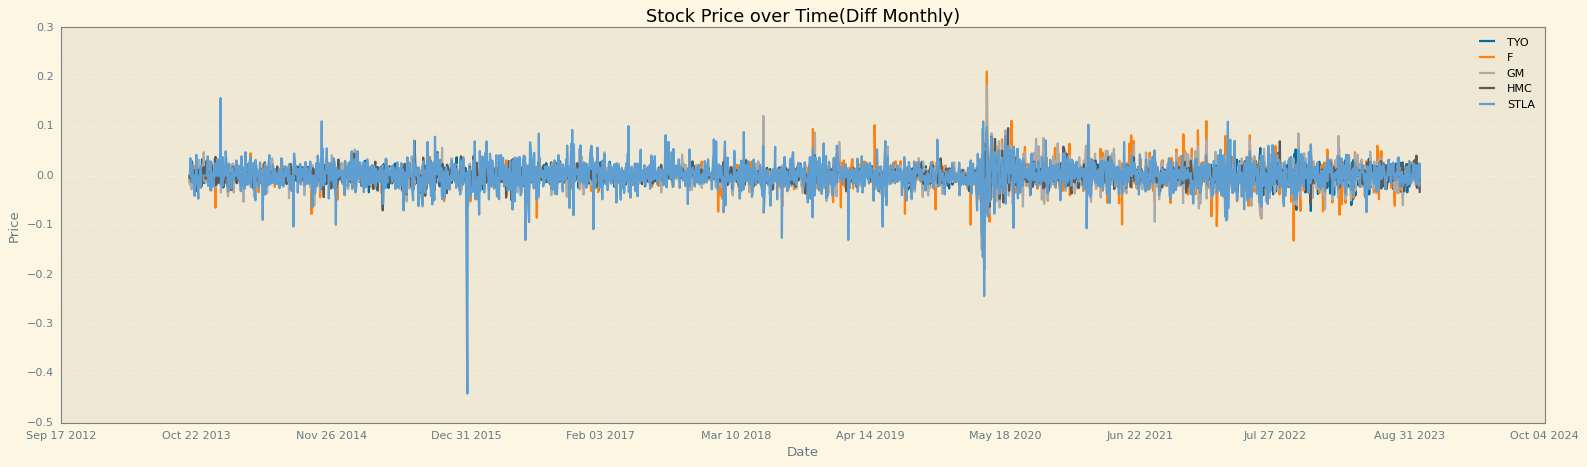

In [150]:
plot_stock_prices("Diff Monthly", df_stock_mo_log, tickers)
plot_stock_prices("Diff Monthly", df_stock_we_log, tickers)
plot_stock_prices("Diff Monthly", df_stock_da_log, tickers)

VAR用データ整形

In [388]:
df_stock_mo_log

,TYO,F,GM,HMC,STLA
Date,,,,,
2013-11-01,0.002962,-0.016935,0.058762,0.036216,-0.089998
2013-12-01,0.029112,-0.052278,0.070616,0.003622,0.002891
2014-01-01,-0.019768,-0.011404,-0.041658,-0.037120,0.242993
2014-02-01,-0.049312,-0.053035,-0.075955,-0.083822,0.043958
2014-03-01,-0.003494,0.021272,-0.014195,-0.018548,0.080001
...,...,...,...,...,...
2023-05-01,0.022666,-0.043917,-0.048099,0.048206,-0.092735
2023-06-01,0.048092,0.165821,0.110242,0.102111,0.027842
2023-07-01,0.029772,0.035749,0.067918,0.006764,0.115178


In [389]:
df_results = perform_adf_test_on_dataframe(df_stock_mo_log)
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_we_log)
display(df_results)
df_results = perform_adf_test_on_dataframe(df_stock_da_log)
display(df_results)

,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-7.74968,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
F,-9.008135,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
GM,-9.049613,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
HMC,-9.391856,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009
STLA,-8.967384,0.0,0,118,Stationary,-3.487022,-2.886363,-2.580009


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-10.076124,0.0,3,517,Stationary,-3.443062,-2.867147,-2.569756
F,-14.559626,0.0,1,519,Stationary,-3.443013,-2.867125,-2.569745
GM,-14.042617,0.0,2,518,Stationary,-3.443037,-2.867136,-2.56975
HMC,-14.378185,0.0,2,518,Stationary,-3.443037,-2.867136,-2.56975
STLA,-22.145238,0.0,0,520,Stationary,-3.442988,-2.867114,-2.569739


,ADF Test Statistic,P-Value,# Lags Used,# Observations,Result,Critical Value (1%),Critical Value (5%),Critical Value (10%)
TYO,-10.076203,0.0,22,2493,Stationary,-3.432976,-2.8627,-2.567388
F,-12.385548,0.0,14,2501,Stationary,-3.432967,-2.862696,-2.567386
GM,-16.397229,0.0,8,2507,Stationary,-3.432961,-2.862694,-2.567384
HMC,-16.990643,0.0,8,2507,Stationary,-3.432961,-2.862694,-2.567384
STLA,-18.427953,0.0,6,2509,Stationary,-3.432959,-2.862693,-2.567384


In [390]:
# 月次データにリサンプリングして平均値を計算
df_economic_REGULAR_GAS_PRICE = df_economic_REGULAR_GAS_PRICE.resample('MS').mean()

df_economic_REGULAR_GAS_PRICE

,GASREGW
DATE,
2013-10-01,3.34375
2013-11-01,3.24275
2013-12-01,3.27640
2014-01-01,3.31250
2014-02-01,3.35625
...,...
2023-05-01,3.55480
2023-06-01,3.57100
2023-07-01,3.59700


VAR用データ準備

In [449]:
# 経済データ取得
df_economic_Retail_CAR = web.DataReader('MRTSSM44112USN', 'fred', start, end)
df_economic_Regular_GAS = web.DataReader('GASREGCOVW', 'fred', start, end)
df_economic_Car_Employee = web.DataReader('CES3133600101', 'fred', start, end)
df_economic_Aluminum_Price = web.DataReader('PALUMUSDM', 'fred', start, end)
df_economic_Tariff = web.DataReader('B235RC1Q027SBEA', 'fred', start, end)

In [458]:
# 月次データに変換し、線形補間を行う
df_economic_Tariff = df_economic_Tariff.resample('MS').asfreq().interpolate(method='linear')

df_economic_Tariff

,B235RC1Q027SBEA
DATE,
2013-10-01,37.071000
2013-11-01,36.956667
2013-12-01,36.842333
2014-01-01,36.728000
2014-02-01,36.704333
...,...
2022-12-01,86.990000
2023-01-01,85.560000
2023-02-01,85.026333


In [459]:
df_results = perform_adf_test_on_dataframe(df_economic_Tariff.copy())
display(df_results)

,# Lags Used,# Observations,ADF Test Statistic,Critical Value (1%),Critical Value (10%),Critical Value (5%),P-Value,Result
B235RC1Q027SBEA,10,104,-1.284341,-3.49485,-2.581822,-2.889758,0.636306,Not Stationary


In [529]:
# 週次データを月次データに変更
df_economic_Regular_GAS = df_economic_Regular_GAS.resample('MS').mean()

df_economic_Regular_GAS

,GASREGCOVW
DATE,
2013-10-01,3.28475
2013-11-01,3.18600
2013-12-01,3.20880
2014-01-01,3.25225
2014-02-01,3.30500
...,...
2023-05-01,3.43220
2023-06-01,3.44575
2023-07-01,3.47680


In [530]:
# 対数差分処理
df_Retail_CAR_log = remove_trend_log(df_economic_Retail_CAR.copy(), ['MRTSSM44112USN'])
df_Regular_GAS_log = remove_trend_log(df_economic_Regular_GAS.copy(), ['GASREGCOVW'])
df_Car_Employee_log = remove_trend_log(df_economic_Car_Employee.copy(), ['CES3133600101'])
df_Aluminum_log = remove_trend_log(df_economic_Aluminum_Price.copy(), ['PALUMUSDM'])
df_Tariff_log = remove_trend_log(df_economic_Tariff.copy(), ['B235RC1Q027SBEA'])

In [533]:
df_Retail_CAR_log

,MRTSSM44112USN
DATE,
2013-11-01,-0.076619
2013-12-01,-0.099907
2014-01-01,0.081909
2014-02-01,0.280032
2014-03-01,0.065457
...,...
2023-04-01,-0.129464
2023-05-01,0.031767
2023-06-01,-0.070391


In [534]:
# df_stock_mo_logと複数の経済データフレームを順番に結合
merged_df = (df_stock_mo_log
            .merge(df_STEEL_log, left_index=True, right_index=True, how='outer')
            .merge(df_Regular_GAS_log, left_index=True, right_index=True, how='outer')
            .merge(df_CARDEMAND_log, left_index=True, right_index=True, how='outer')
            .merge(df_Retail_CAR_log, left_index=True, right_index=True, how='outer')
            .merge(df_Car_Employee_log, left_index=True, right_index=True, how='outer')
            .merge(df_Aluminum_log, left_index=True, right_index=True, how='outer')
            .merge(df_Tariff_log, left_index=True, right_index=True, how='outer')
            )

# カラム名変更
merged_df = (merged_df
              .rename(columns={'WPU10170502': 'STEEL'})
              .rename(columns={'GASREGCOVW': 'Regular_GAS_Price'})
              .rename(columns={'AMVPNO': 'DEMAND'})
              .rename(columns={'MRTSSM44112USN': 'Retail_CAR'})
              .rename(columns={'CES3133600101': 'Employee'})
              .rename(columns={'PALUMUSDM': 'Aluminum_Price'})
              .rename(columns={'B235RC1Q027SBEA': 'Tariff'})
              )

# NaNを含む行を削除
merged_df.dropna(inplace=True)

merged_df

,TYO,F,GM,HMC,STLA,STEEL,Regular_GAS_Price,DEMAND,Retail_CAR,Employee,Aluminum_Price,Tariff
2013-11-01,0.002962,-0.016935,0.058762,0.036216,-0.089998,0.004505,-0.030524,0.033270,-0.076619,0.007101,-0.037404,-0.003089
2013-12-01,0.029112,-0.052278,0.070616,0.003622,0.002891,-0.006764,0.007131,-0.065605,-0.099907,0.005293,-0.004676,-0.003099
2014-01-01,-0.019768,-0.011404,-0.041658,-0.037120,0.242993,0.000000,0.013450,0.001072,0.081909,-0.011682,-0.007152,-0.003108
2014-02-01,-0.049312,-0.053035,-0.075955,-0.083822,0.043958,0.003388,0.016089,0.066355,0.280032,0.019162,-0.018844,-0.000645
2014-03-01,-0.003494,0.021272,-0.014195,-0.018548,0.080001,0.006742,0.049870,-0.000552,0.065457,0.002094,0.006000,-0.000645
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-0.067946,-0.100355,-0.077069,-0.003632,0.003181,-0.000190,-0.135303,0.001688,-0.065045,0.009105,0.020001,-0.016305
2023-01-01,-0.029608,0.015531,-0.004382,0.017352,0.055772,0.000000,0.053943,0.006283,0.113704,-0.004399,0.039528,-0.016575
2023-02-01,0.056026,0.014605,0.121737,0.054355,0.091348,0.000000,0.015126,-0.000065,0.114862,0.003635,-0.032061,-0.006257
2023-03-01,-0.023893,-0.066060,-0.125309,0.023429,0.050638,0.000000,0.003550,-0.001824,0.201289,0.004573,-0.050838,-0.006296


In [563]:
df = merged_df[[
                'Tariff',
                'STEEL',
                'Regular_GAS_Price',
                # 'Aluminum_Price',
                # 'DEMAND',
                # 'F',
                'GM',
                'TYO',
                # 'HMC',
                # 'STLA',
                # 'Retail_CAR'
                'Employee'
                ]]
df

,Tariff,STEEL,Regular_GAS_Price,GM,TYO,Employee
2013-11-01,-0.003089,0.004505,-0.030524,0.058762,0.002962,0.007101
2013-12-01,-0.003099,-0.006764,0.007131,0.070616,0.029112,0.005293
2014-01-01,-0.003108,0.000000,0.013450,-0.041658,-0.019768,-0.011682
2014-02-01,-0.000645,0.003388,0.016089,-0.075955,-0.049312,0.019162
2014-03-01,-0.000645,0.006742,0.049870,-0.014195,-0.003494,0.002094
...,...,...,...,...,...,...
2022-12-01,-0.016305,-0.000190,-0.135303,-0.077069,-0.067946,0.009105
2023-01-01,-0.016575,0.000000,0.053943,-0.004382,-0.029608,-0.004399
2023-02-01,-0.006257,0.000000,0.015126,0.121737,0.056026,0.003635
2023-03-01,-0.006296,0.000000,0.003550,-0.125309,-0.023893,0.004573


VAR適応

In [564]:
import pandas as pd
from statsmodels.tsa.api import VAR

model = VAR(df)

/Users/klynoaguilar/opt/anaconda3/envs/Analysis/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [585]:
_temp = model.select_order(maxlags=3).summary()
_temp

,AIC,BIC,FPE,HQIC
0,-37.01,-36.87,8.420e-17,-36.95
1,-37.94*,-36.91*,3.341e-17*,-37.52*
2,-37.88,-35.97,3.568e-17,-37.11
3,-37.73,-34.94,4.215e-17,-36.60


In [586]:
_result = model.fit(1)

In [587]:
_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Oct, 2023
Time:                     20:14:28
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -37.0247
Nobs:                     113.000    HQIC:                  -37.6270
Log likelihood:           1229.13    FPE:                3.02380e-17
AIC:                     -38.0384    Det(Omega_mle):     2.10832e-17
--------------------------------------------------------------------
Results for equation Tariff
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.001987         0.002313            0.859           0.390
L1.Tariff                    0.802661         0.071040           11.299           0.000
L1.STEEL                    -0.

グレンジャー

In [588]:
from copy import deepcopy

def causality_vs_each(data, model):
    columns = data.columns.tolist()

    for i in range(len(columns)):
        vs = deepcopy(columns)
        tv = vs.pop(i)
        for v in vs:
            result = model.test_causality(tv, v, kind='f')
            print(result.summary())

In [589]:
causality_vs_each(df, _result)

Granger causality F-test. H_0: STEEL does not Granger-cause Tariff. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.1142          3.856   0.736 (1, 636)
----------------------------------------------
Granger causality F-test. H_0: Regular_GAS_Price does not Granger-cause Tariff. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.3648          3.856   0.546 (1, 636)
----------------------------------------------
Granger causality F-test. H_0: GM does not Granger-cause Tariff. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         2.570          3.856   0.109 (1, 636)
----------------------------------------------
Granger causality F-test. H_0: TYO does not Granger-

インパルス応答

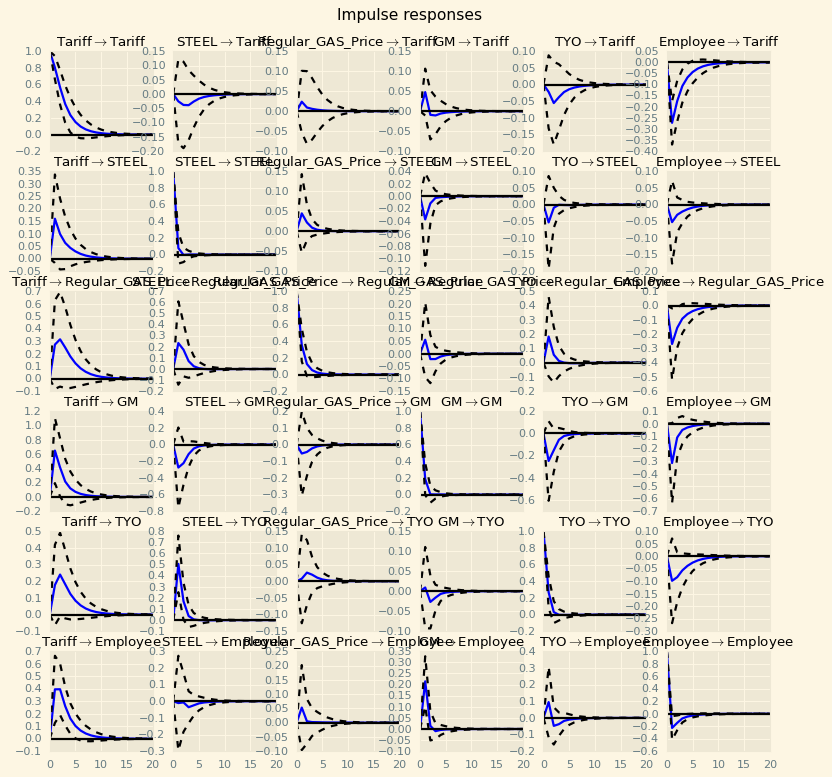

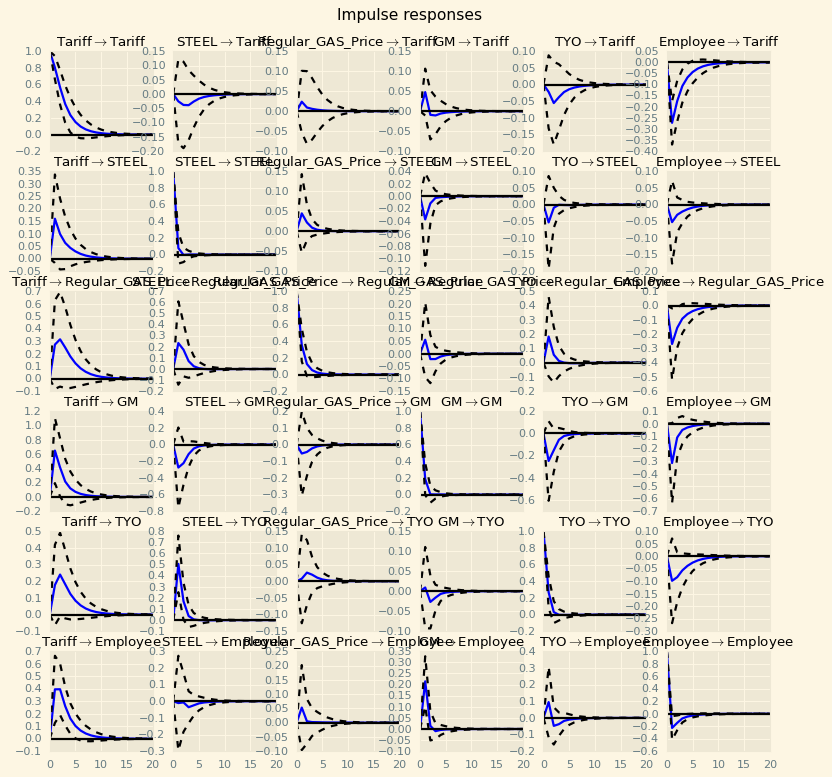

In [594]:
_result.irf(20).plot()

In [591]:
FEVD = _result.fevd()

In [592]:
FEVD.summary()

FEVD for Tariff
       Tariff     STEEL  Regular_GAS_Price        GM       TYO  Employee
0    1.000000  0.000000           0.000000  0.000000  0.000000  0.000000
1    0.850230  0.001053           0.003028  0.008360  0.000007  0.137323
2    0.819656  0.002161           0.006349  0.009472  0.001791  0.160572
3    0.810159  0.003181           0.007381  0.010608  0.002509  0.166162
4    0.806807  0.003603           0.007735  0.010905  0.002717  0.168232
5    0.805494  0.003757           0.007878  0.011003  0.002792  0.169077
6    0.804959  0.003817           0.007937  0.011043  0.002822  0.169421
7    0.804739  0.003842           0.007962  0.011060  0.002835  0.169562
8    0.804649  0.003852           0.007972  0.011067  0.002840  0.169620
9    0.804612  0.003856           0.007976  0.011070  0.002843  0.169643

FEVD for STEEL
       Tariff     STEEL  Regular_GAS_Price        GM       TYO  Employee
0    0.000057  0.999943           0.000000  0.000000  0.000000  0.000000
1    0.011691  0.96

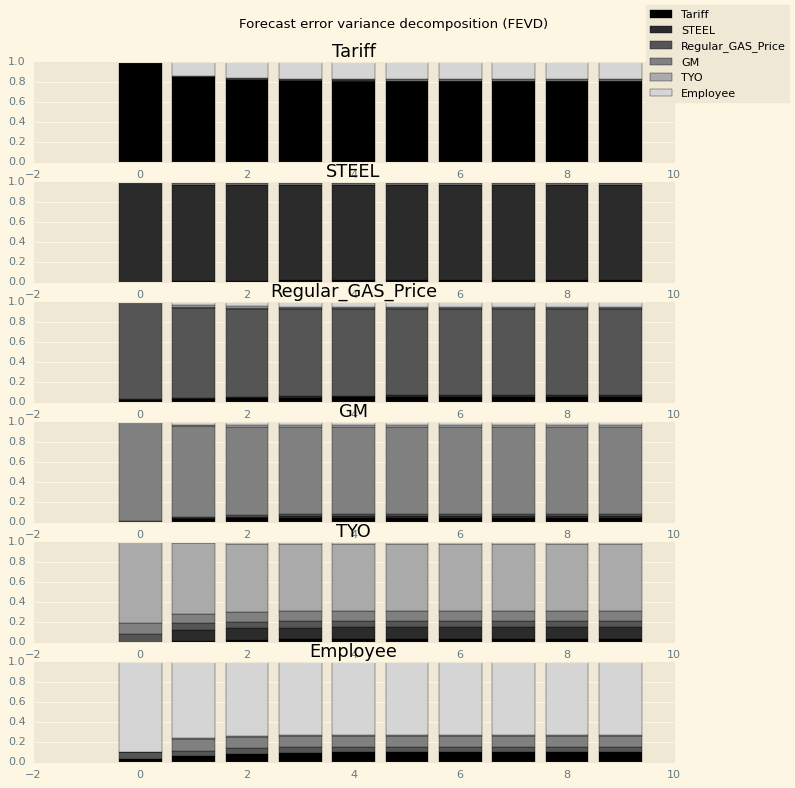

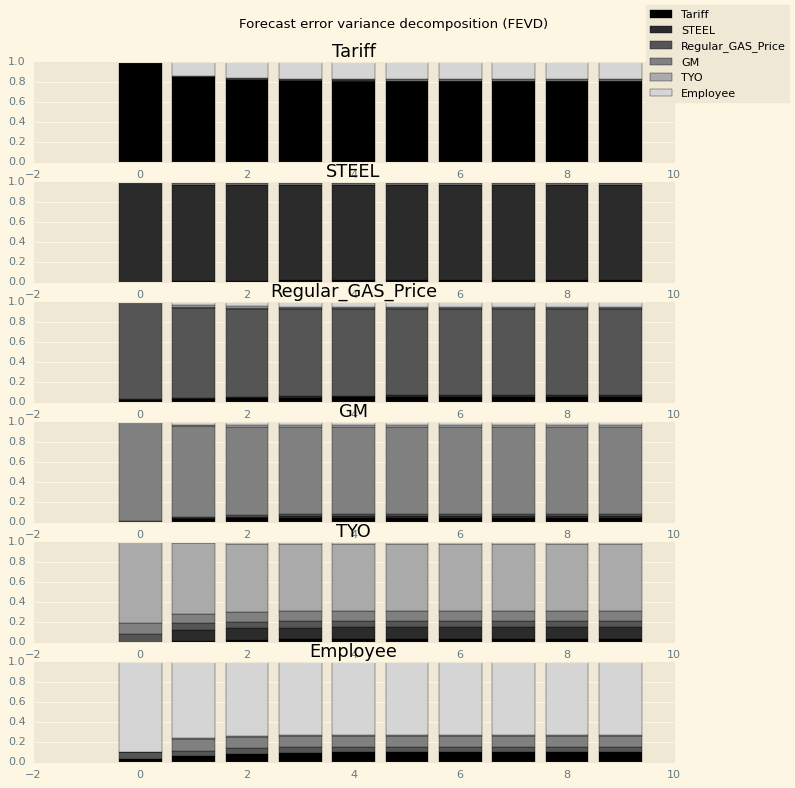

In [593]:
FEVD.plot()